In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import scipy.optimize as sopt

plt.rcParams["figure.figsize"] = (6,3)

# Data science & Python & Machine Learning

### Машинное обучение: классификация, представление данных и деревья решений

### Train/dev/test

- dev = Public Leaderboard
- test = Private Leaderboard

- Выбирая оптимальные гиперпараметры мы тоже переобучаемся
- На самом деле нам нужно не 2 выборки, а 3: train/dev/test
- dev используется для выбора лучшего алгоритма и лучших гиперпараметров
- test используется только для проверки

### Классификация

- В прошлый раз мы научились решать задачу регрессии
- Классификация несколько сложнее
- Мы либо ошибаемся, либо нет

### Бинарная классификация

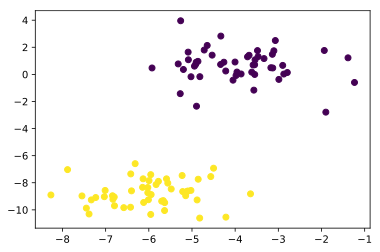

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=17)
plt.scatter(X[:, 0], X[:, 1], c=y);

(array([[-0.04023265, -3.34219085]]), array([-15.39831144]))

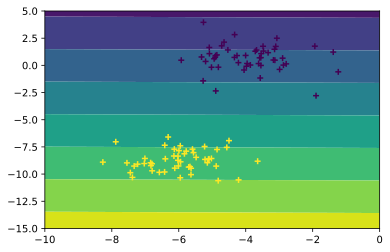

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000000.0).fit(X, y)
xx, yy = np.meshgrid(np.linspace(-10, 0, 100), np.linspace(-15, 5, 100))
Z = lr.decision_function(np.c_[xx.ravel(), yy.ravel()])
plt.contourf(xx, yy, Z.reshape(xx.shape));
plt.scatter(X[:, 0], X[:, 1], c=y, marker='+');

lr.coef_, lr.intercept_

### 1/0 loss

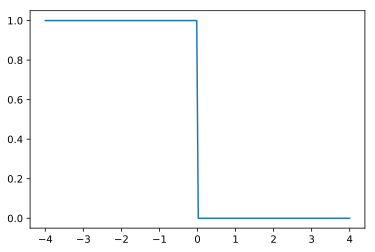

In [4]:
xs = np.linspace(-4, 4, 200); y_true = +1.0
plt.plot(xs, xs < 0.0);

### Surrogate loss

- Оптимизация функции со значениями 1/0 чрезвычайно трудна
- Нам нужно придумать целевую функцию, которая похожа
- Это превращает любой "регрессор" в бинарный классификатор

### Logistic loss

Линейная модель - `LogisticRegression`

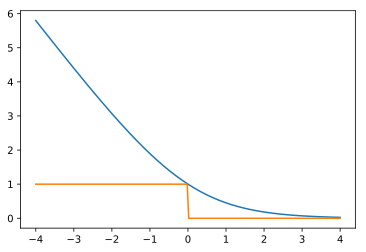

In [5]:
xs = np.linspace(-4, 4, 200); y_true = +1.0
plt.plot(xs, np.log2(1.0 + np.exp(-y_true*xs)));
plt.plot(xs, xs < 0.0);

### Hinge loss

Линейная модель - `LinearSVC`

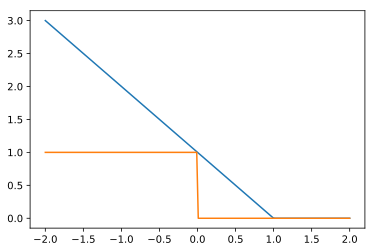

In [6]:
xs = np.linspace(-2, 2, 200); y_true = +1.0
plt.plot(xs, np.maximum(0.0, 1.0 - y_true*xs));
plt.plot(xs, xs < 0.0);

### Мультиклассовая классификация

- Большинство интересных задач имеет несколько классов
- One vs Rest: для каждого класса строим бинарный классификатор, отделяющий его от остальных
- Есть другие методы, но на практике почти всегда используется OvR

### Пропущенные данные

- Для линейных методов подходит подстановка среднего/медианы/квантиля
- Если это "мощный" метод, например бустинг, то лучше всего заменять на несуществующее значение (-1)
- Если в столбце большинство значений пропущены, его иногда лучше выбросить
- Выбрасывать строки с пропущенными значениями опасно

### Счетчики

- Многие числовые столбцы распределены $[0, +\infty)$ с тяжелым хвостом
- Линейные модели плохо устойчивы к такому
- Типичная тактика: взять корень или логарифм


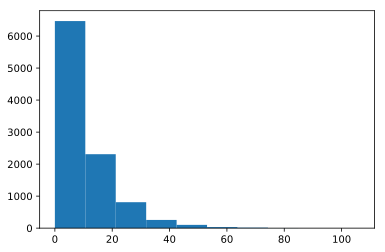

In [7]:
sample = np.random.exponential(scale=10.0, size=10000)
plt.hist(sample);

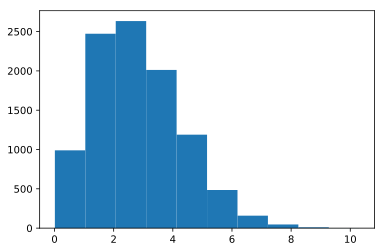

In [28]:
plt.hist(np.sqrt(sample));

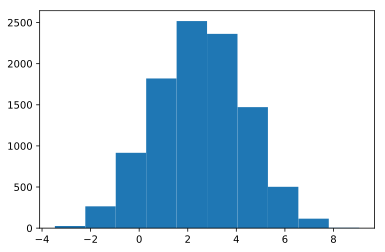

In [9]:
from scipy.stats import boxcox

plt.hist(boxcox(sample)[0]);

### Другие преобразования

- Квантильное хорошо подходит для асимметричных распределений: `QuantileTransformer`
- Можно добавлять попарные произведения

### Категориальные данные

- Некоторые признаки принимают конечное число значений
- Их придется превратить в числа
- Все редкие значения лучше заменить на некоторое специальное значение

### Label encoding

- Каждую категорию превращаем в число
- Не подходит для линейных моделей

In [10]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder().fit_transform([['a'], ['b'], ['c'], ['a']])

array([0, 1, 2, 0])

### One-hot encoding

- Создаем столько столбцов, сколько уникальных значений
- 1 записываем в соответствующий столбец
- Подходит для линейных моделей

In [37]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder().fit_transform([[1], [3], [2], [4]]).todense()

matrix([[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.]])

### Текстовые данные

In [12]:
from sklearn.datasets import fetch_20newsgroups
print(fetch_20newsgroups()['data'][0][:200])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out


### TF-IDF

- Для обработки текста тоже хорошо подойдет one-hot encoding, но в нём все слова равнозначны
- TF-IDF лучше подскажет на что обратить внимание

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVectorizer().fit_transform(fetch_20newsgroups()['data'])

<11314x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

### Сложные зависимости

- Все модели оперируют простыми правилами
- Экспоненты, тригонометрические функции и прочее выучить им бывает трудно
- Если вы знаете некоторую сложную зависимость её нужно обязательно предоставить модели как признак

### Эвристические признаки

- Все ваши знания о предметной области нужно как можно более явно использовать при подготовке данных
- Численные параметры (доход, возраст, ...) иногда лучше делить на группы

### Деревья решений

- Рекурсивно делит выборку на группы (узлы дерева)
- Для каждой из групп принимает решение (листья дерева)

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('cs-training.csv', index_col=0)
df.fillna(inplace=True, value=-1.0)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt.fit(df.drop(columns='SeriousDlqin2yrs'), df.SeriousDlqin2yrs)

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

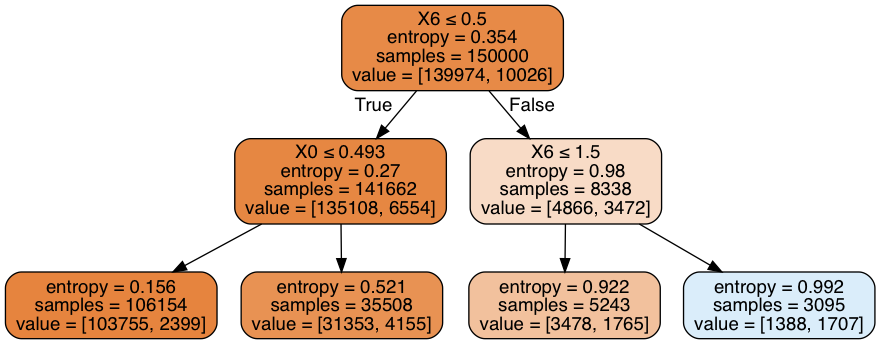

In [15]:
Image(graph.create_png())

### Энтропия

- Мера хаоса/беспорядка в данных
- Поможет нам оценить разные разбиения

In [16]:
p = df.SeriousDlqin2yrs.value_counts(normalize=True)
p = np.array([0.0001, 0.9999])
np.sum(- p * np.log2(p))

0.0014730335283281598

### Прирост информации

- Мы можем вычислить энтропию целевого признака до разбиения
- В каждом разбиении мы тоже можем вычислить энтропию
- Разница между ними - прирост информации

### ID3

- Выбираем предикат, обладающий наибольшим приростом информации 
- Рекурсивно для каждого под-дерева
- Жадный алгоритм
- Дальше придумали еще много алгоритмов: CART, C4.5, C5.0, ...

### На практике

In [17]:
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('cs-training.csv', index_col=0)
df.fillna(inplace=True, value=-1.0)
dt = DecisionTreeClassifier()
dt.fit(df.drop(columns='SeriousDlqin2yrs'), df.SeriousDlqin2yrs)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Свойста деревьев решений

- Гораздо менее требовательны к подготовке данных
- Долго учатся, но быстро работают
- Обычно дают отличный результат, но легко переобучаются

### Опять bias/variance 

- Bias: алгоритм не подгоняется под данные даже с ростом их количества
- Variance: алгоритм сильно по-разному ведет себя на разных выборках
- Bias скомпенсировать нельзя, но Variance обычно можно устранить

### Теорема Кондорсе

- Рассмотрим жюри из $N$ присяжных
- Каждый присяжный принимает правильное решение с вероятностью $p$ НЕЗАВИСИМО
- Итоговое решение принимается большинством
- Что происходит, когда мы увеличиваем $N$?

In [18]:
[np.random.random() > 0.55 for _ in range(10)]

[True, True, True, True, False, False, False, False, False, True]

### Ансамбли моделей

- Чтобы снизить variance мы можем использовать несколько как можно более независимых моделей
- В регрессии итоговый результат усредняется, в классификации происходит голосование
- Нам нужна процедура обучения нескольких независимых моделей

### Bootstrap Aggregating (Bagging)

- Бутстреппинг позволяет создать много выборок из одной
- Независимый ансамбль моделей можно получить обучаясь на каждой из них

In [19]:
df = pd.read_csv('cs-training.csv')
for _ in range(100):
    df.sample(replace=True)
    ...
    # train model

### Random Forest

- Совмещая принцип bagging и деревья решений получим random forest
- Делаем много выборок через bagging и строим много деревьев (лес)
- Сделаем выборки еще более независимыми выбрасывая случайные столбцы

### Random Forest

- Один из самых эффективных алгоритмов, работающий "из коробки"
- Деревья должны быть чуть глубже, чем у бустинговых алгоритмов (почему?)
- Количество деревьев должно быть "достаточным"

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10)

### Бустинг

- Итеративный алгоритм построения независимых моделей
- Модель 1 подгоняется под $y$
- Модель 2 подгоняется под ошибки модели 1: $\ell (y, f_1(x))$
- Модель 3 подгоняется под ошибки модели 1 и модели 2: $\ell (y, m(f_1(x), f_2(x)))$
- ...

In [21]:
from catboost import CatBoostClassifier

### Домашнее задание

- Загружаем данные и готовим их
- Обучаем разные деревья решений и их ансамбли
- Изучаем, что происходит, когда меняем параметры